# Курс "Python для анализа данных"

---
#5.2.1 Обзор основных возможностей библиотеки Seaborn

## Где мы сейчас?


<html>
 <head>
  <meta charset="utf-8">
 </head>
 <body>
  <ul>
    <li>1. Введение в анализ данных и разработку на языке Python </li> 
    <li>2. Основы языка </li> 
    <li>3. Библиотеки NumPy и SciPy для решения задач анализа данных и машинного обучения </li> 
    <li>4. Библиотека Pandas для работы с высокоуровневыми структурами данных </li> 
    <li>5. <strong>Визуализации результатов анализа данных с использованием библиотек Matplotlib, Seaborn, Pandas</strong> <i><- Вот в этой главе!</i>
     <ul>
      <li>5.1 Краткое введение в API библиотеки Matplotlib</li>      
      <li><strong>5.2 Краткое введение в API библиотеки Seaborn</strong> <i><- Вот в этом параграфе!</i></li>
       <ul>
        <li><strong>5.2.1 Обзор основных возможностей библиотеки Seaborn</strong><i> <- Вот в этом пункте!</i></li>
        <li>5.2.2 Примеры использования библиотеки Seaborn</li>
       </ul>
      <li>5.3 Функции построения графиков в Pandas</li>
     </ul>
    </li>   
  </ul>
 </body>
</html>

## О чем будем говорить?


О еще одном популярном пакете визуализации - ```seaborn```. 

## Ключевые слова, понятия и выражения






*   ```seaborn```

## Материал

Список доступных для экспериментов датасетов можно найти по этой [ссылке](https://github.com/mwaskom/seaborn-data).

### Реляционные графики

In [ ]:
import seaborn as sns

sns.set(style="ticks")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


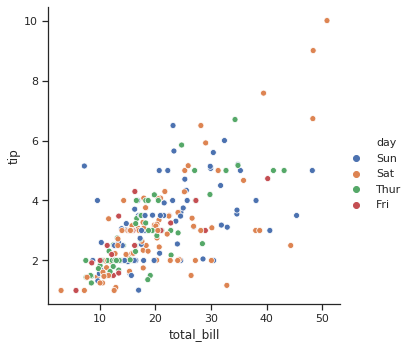

In [ ]:
g = sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

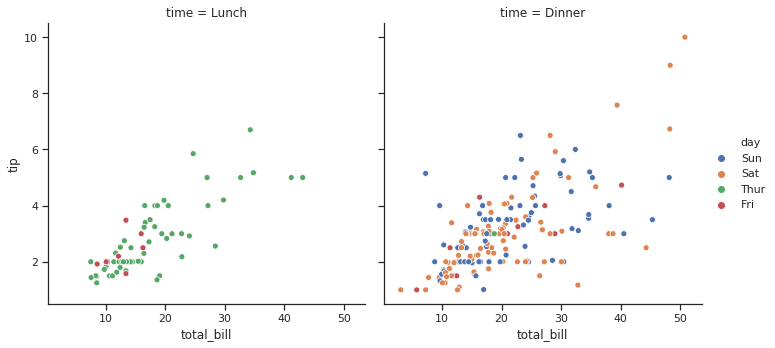

In [ ]:
g = sns.relplot(x="total_bill", y="tip", hue="day", 
                col="time", data=tips)

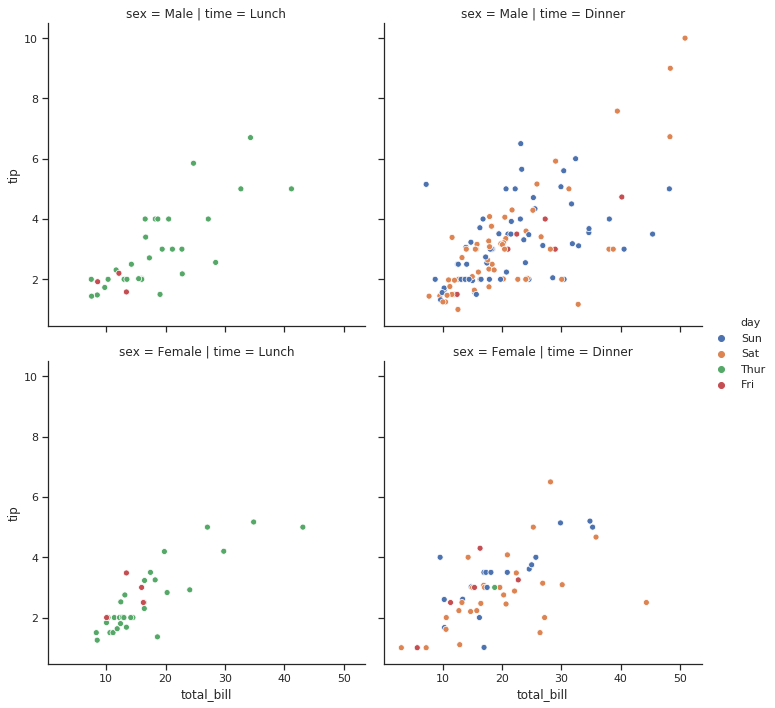

In [ ]:
g = sns.relplot(x="total_bill", y="tip", hue="day", 
                col="time", row="sex", data=tips)

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip",
                     hue="day", style="time", data=tips)

### Визуализация отношений категориальных данных

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Количественные графики

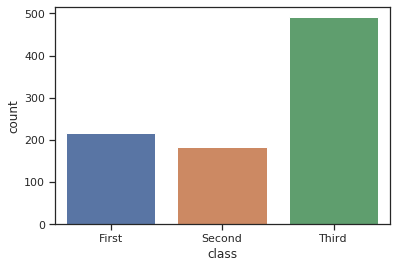

In [ ]:
sns.countplot(x="class", data=titanic)

#### Графики среднего с оценкой разлета значений при различной разбивке данных

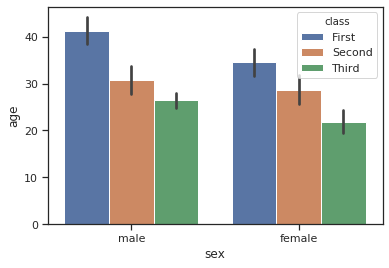

In [ ]:
sns.barplot(x="sex", y="age", hue="class", data=titanic)

In [ ]:
titanic.groupby(['sex','class'])['age'].mean()

sex     class 
female  First     34.611765
        Second    28.722973
        Third     21.750000
male    First     41.281386
        Second    30.740707
        Third     26.507589
Name: age, dtype: float64

In [ ]:
titanic.groupby(['sex','class'])['age'].std()

sex     class 
female  First     13.612052
        Second    12.872702
        Third     12.729964
male    First     15.139570
        Second    14.793894
        Third     12.159514
Name: age, dtype: float64

#### "Ящик с усами"



![alt text](https://drive.google.com/uc?id=13KXNNZKyB3Jv5MyMwHRZAOTFAbpnoRl7)

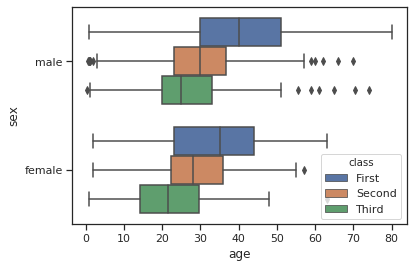

In [ ]:
sns.boxplot(x="age", y="sex", hue="class", orient="h", data=titanic)

In [ ]:
titanic.groupby(['sex','class'])['age'].median()

sex     class 
female  First     35.0
        Second    28.0
        Third     21.5
male    First     40.0
        Second    30.0
        Third     25.0
Name: age, dtype: float64

#### Комбинация "ящика с усами" и функции распределения

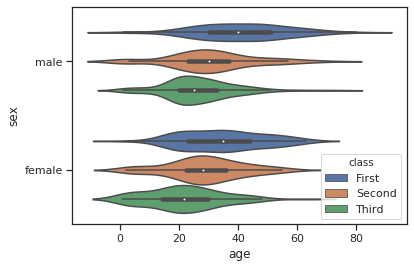

In [ ]:
sns.violinplot(x="age", y="sex", hue="class", orient="h", data=titanic)

### Графики распределений

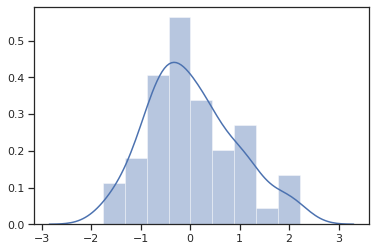

In [ ]:
import seaborn as sns
import numpy as np

x = np.random.randn(100)
ax = sns.distplot(x)

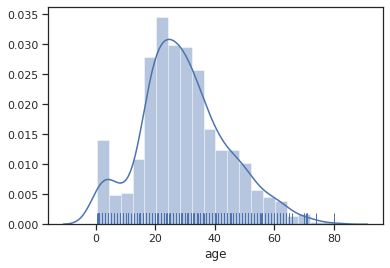

In [ ]:
sns.distplot(titanic['age'],rug=True)

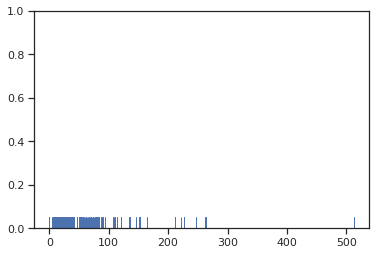

In [ ]:
sns.rugplot(titanic['fare'])

### Графики регрессии

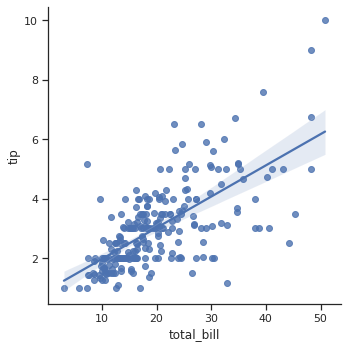

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips)

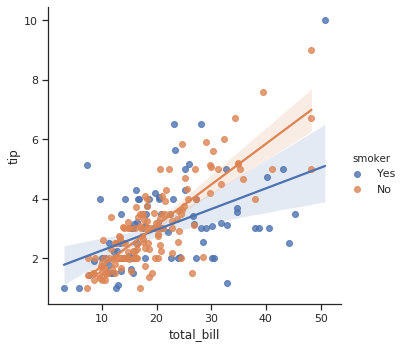

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

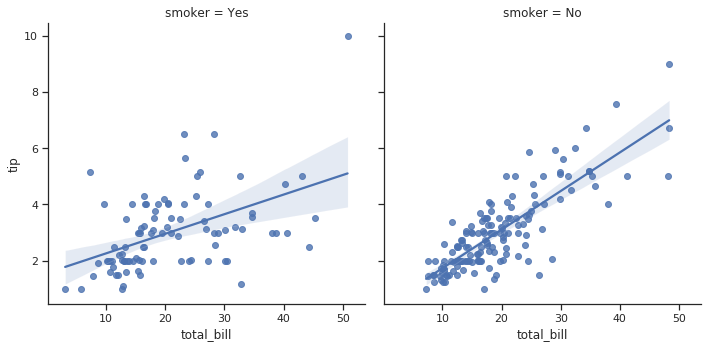

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

### Тепловые карты для визуализации матричных данных

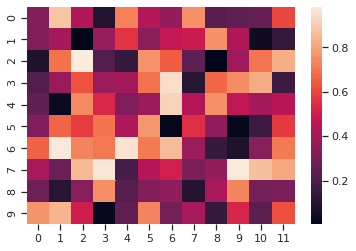

In [ ]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

class   First  Second  Third
sex                         
female     91      70     72
male       45      17     47


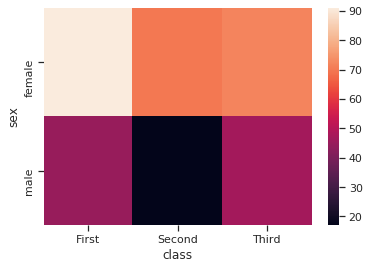

In [ ]:
tit_srv = titanic.pivot_table('survived','sex','class',aggfunc=np.sum)
print(tit_srv.head())
sns.heatmap(tit_srv)

### Визуализация попарных отношений признаков в данных

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


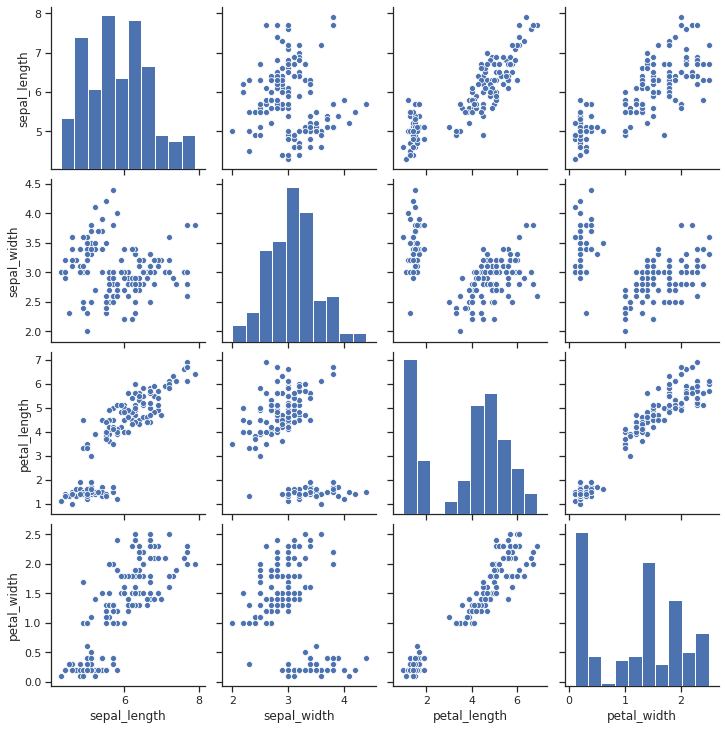

In [ ]:
g = sns.pairplot(iris)

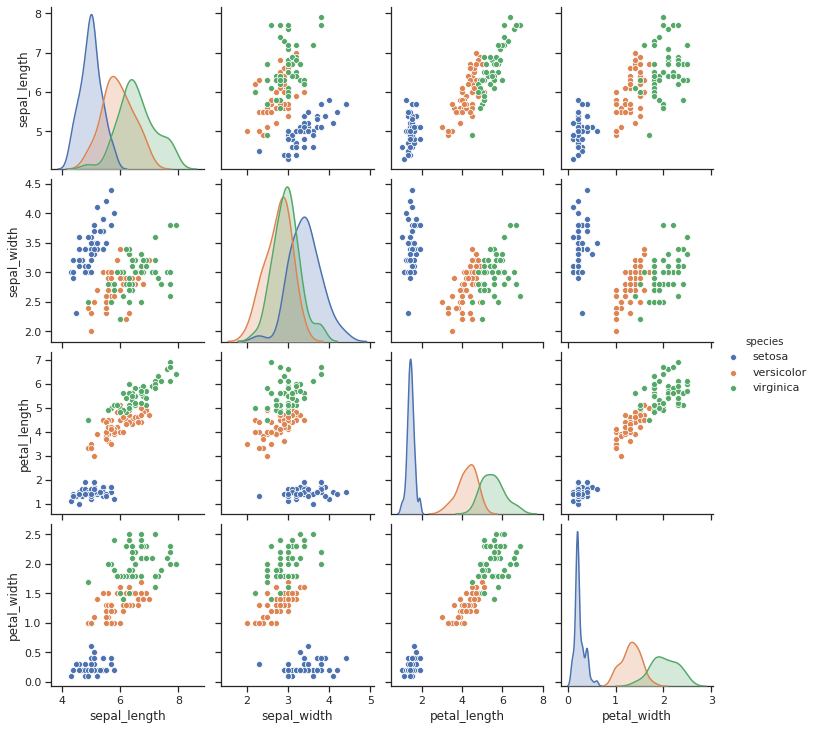

In [ ]:
g = sns.pairplot(iris, hue="species")

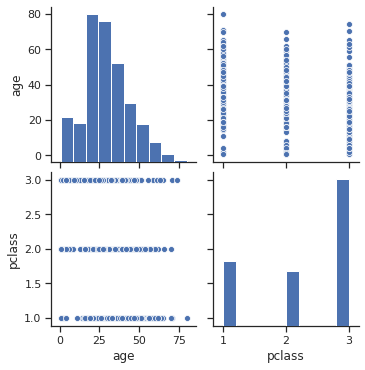

In [ ]:
sns.pairplot(titanic, vars=['age','pclass'])

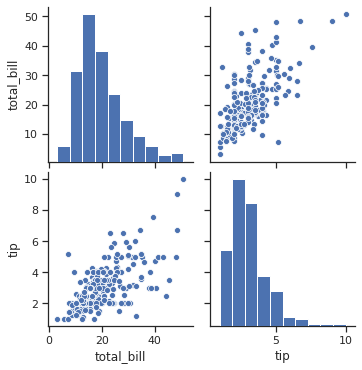

In [ ]:
sns.pairplot(tips, vars=['total_bill','tip'])

### Визуализация совместных распределений

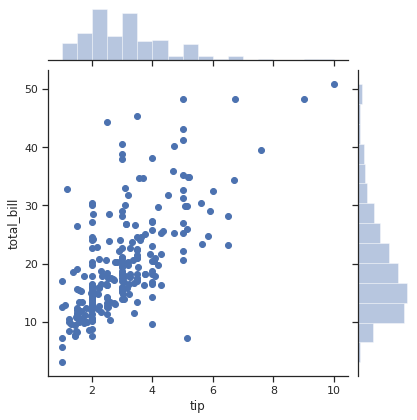

In [ ]:
sns.jointplot(y="total_bill", x="tip", data=tips)

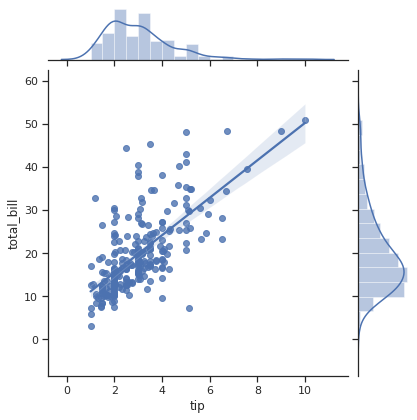

In [ ]:
sns.jointplot(y="total_bill",x="tip", data=tips, kind="reg")

## Дополнительные материалы и литература



*   Уэс Маккинли, Python и анализ данных/ Пер. с англ. Слинкин А. А. - М.: ДМК Пресс, 2015. - 482 с.: ил. С. 244
*   https://python-scripts.com/matplotlib
*   https://matplotlib.org/